In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [79]:
import json
import os

In [97]:
FILE_NAME = 'sit' #'dog-sit-007296'

In [98]:
file_list = os.listdir('image/' + FILE_NAME)

In [99]:
with open('label/' + FILE_NAME + '.json', 'r') as f:
    data = json.load(f)['annotations']

In [90]:
edges = [(0, 1), (0, 3), (1, 2), (1, 4), (2, 3), (4, 5), (4, 6), (4, 13), (5, 7), (6, 8), (9, 11), (9, 13), (10, 12), (10, 13), (13, 14)]

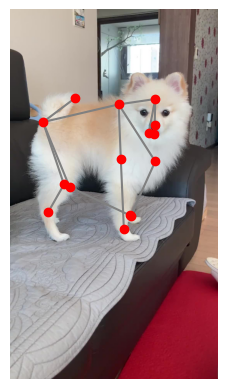

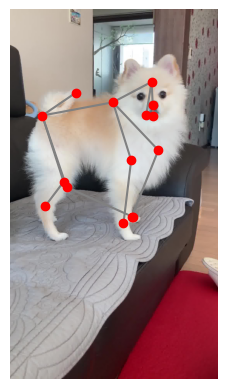

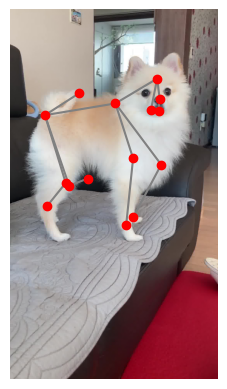

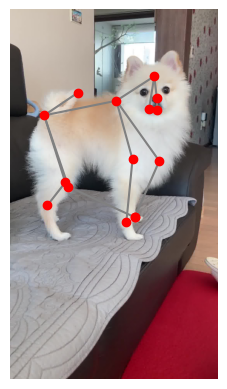

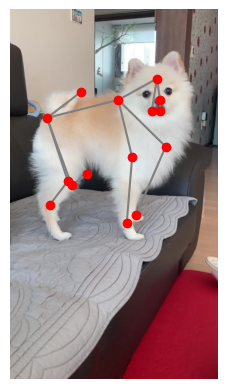

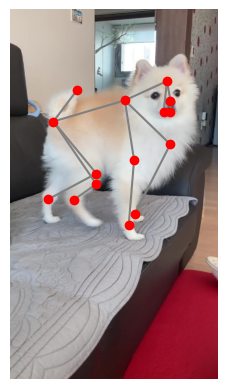

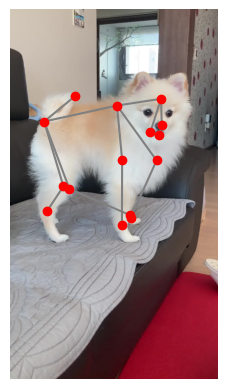

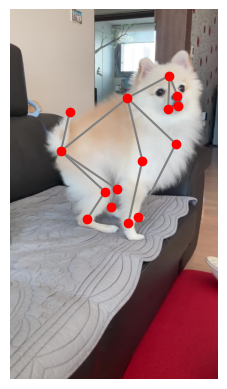

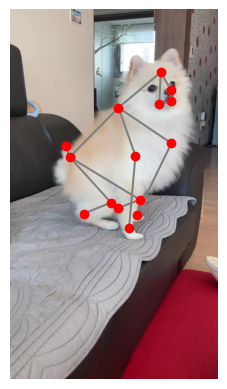

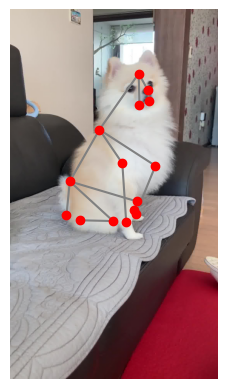

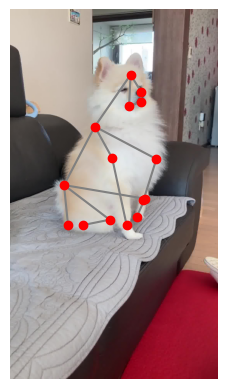

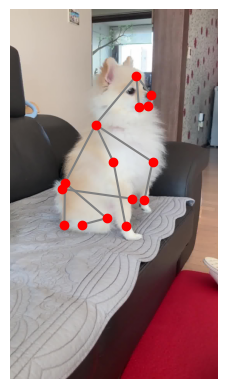

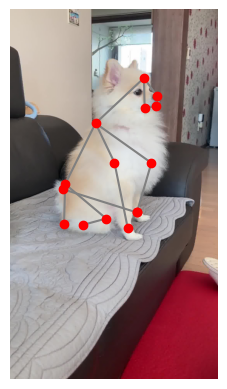

In [101]:
for frame in file_list:
    frame_ = frame.split('.')[0].split('_')
    num = int(frame_[1])
    time = int(frame_[3])
    
    key = [d['keypoints'] for d in data if d['frame_number'] == num and d['timestamp'] == time][0]
    
    x_coor = [point['x'] for point in key.values()]
    y_coor = [point['y'] for point in key.values()]
    
    img_ = img.imread('image/' + FILE_NAME + '/' + frame)
    
    fig, ax = plt.subplots()
    plt.axis('off')
    plt.imshow(img_)

    ax.scatter(x_coor, y_coor, color='red', zorder=2)

    for edge in edges:
        x1, y1 = x_coor[edge[0]], y_coor[edge[0]]
        x2, y2 = x_coor[edge[1]], y_coor[edge[1]]
        ax.plot([x1, x2], [y1, y2], color='gray', zorder=1)
    
    plt.savefig('image/' + FILE_NAME + '/bone/' + frame, bbox_inches='tight')